In [1]:
import pandas as pd
import os
import seaborn
from datetime import datetime
import time
import math
import matplotlib.pyplot as plt

In [2]:
record_df = pd.read_csv("out/compiled_records_cohorts_13-353.csv", index_col=[0])
user_df = pd.read_csv("out/compiled_user_info_cohorts_13-353.csv", index_col=[0])

In [3]:
# construct more attributes
record_df["kps"] = record_df["inputs"] / record_df["final_time"] # keys per second
record_df["kpp"] = record_df["inputs"] / record_df["pieces_placed"] # keys per piece
record_df["percent_perf"] = record_df["finesse_perf"] / record_df["pieces_placed"] # percent of pieces placed with perfect finesse
# TODO figure out how the finesse percentage is calcualted

In [4]:
def calcTimePlayed(x):
    if x and isinstance(x, str):
        return time.time() - datetime.fromisoformat(x).timestamp()
    else:
        return math.nan
    
user_df["time_played"] = user_df["created_date"].apply(calcTimePlayed) # time since account creation

In [5]:
record_df.loc[record_df["finesse_faults"] > 5000]

,record_id,user_id,datetime,current_pb,once_pb,final_time,pps,inputs,score,pieces_placed,singles,doubles,triples,quads,all_clears,finesse_faults,finesse_perf,kps,kpp,percent_perf
66835,6707c0024aef43a49445e542,628f20e91de244ce13de8ded,2024-10-10T11:52:34.389Z,False,False,271975.0,0.389754,5077,9201,106,23,9,0,0,0,5190.0,82.0,0.018667,47.896226,0.773585


In [6]:
crazy_outlier = record_df.loc[record_df["finesse_faults"] > 5000].index
record_df.drop(crazy_outlier, inplace=True)

In [14]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3398 entries, 0 to 3397
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3398 non-null   object 
 1   username            3398 non-null   object 
 2   rank                3398 non-null   int64  
 3   cohort              3398 non-null   int64  
 4   best_time           3398 non-null   float64
 5   best_record         3398 non-null   object 
 6   country             3286 non-null   object 
 7   created_date        3396 non-null   object 
 8   xp                  3398 non-null   float64
 9   achievement_rating  3398 non-null   int64  
 10  TL_games_played     3398 non-null   int64  
 11  TL_games_won        3398 non-null   int64  
 12  TL_play_time        3398 non-null   float64
 13  num_records         3398 non-null   int64  
 14  time_played         3396 non-null   float64
dtypes: float64(4), int64(6), object(5)
memory usage: 424.8+ KB


In [7]:
record_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69641 entries, 0 to 69641
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   record_id       69641 non-null  object 
 1   user_id         69641 non-null  object 
 2   datetime        69641 non-null  object 
 3   current_pb      69641 non-null  bool   
 4   once_pb         69641 non-null  bool   
 5   final_time      69641 non-null  float64
 6   pps             69641 non-null  float64
 7   inputs          69641 non-null  int64  
 8   score           69641 non-null  int64  
 9   pieces_placed   69641 non-null  int64  
 10  singles         69641 non-null  int64  
 11  doubles         69641 non-null  int64  
 12  triples         69641 non-null  int64  
 13  quads           69641 non-null  int64  
 14  all_clears      69641 non-null  int64  
 15  finesse_faults  69614 non-null  float64
 16  finesse_perf    69614 non-null  float64
 17  kps             69641 non-null  floa

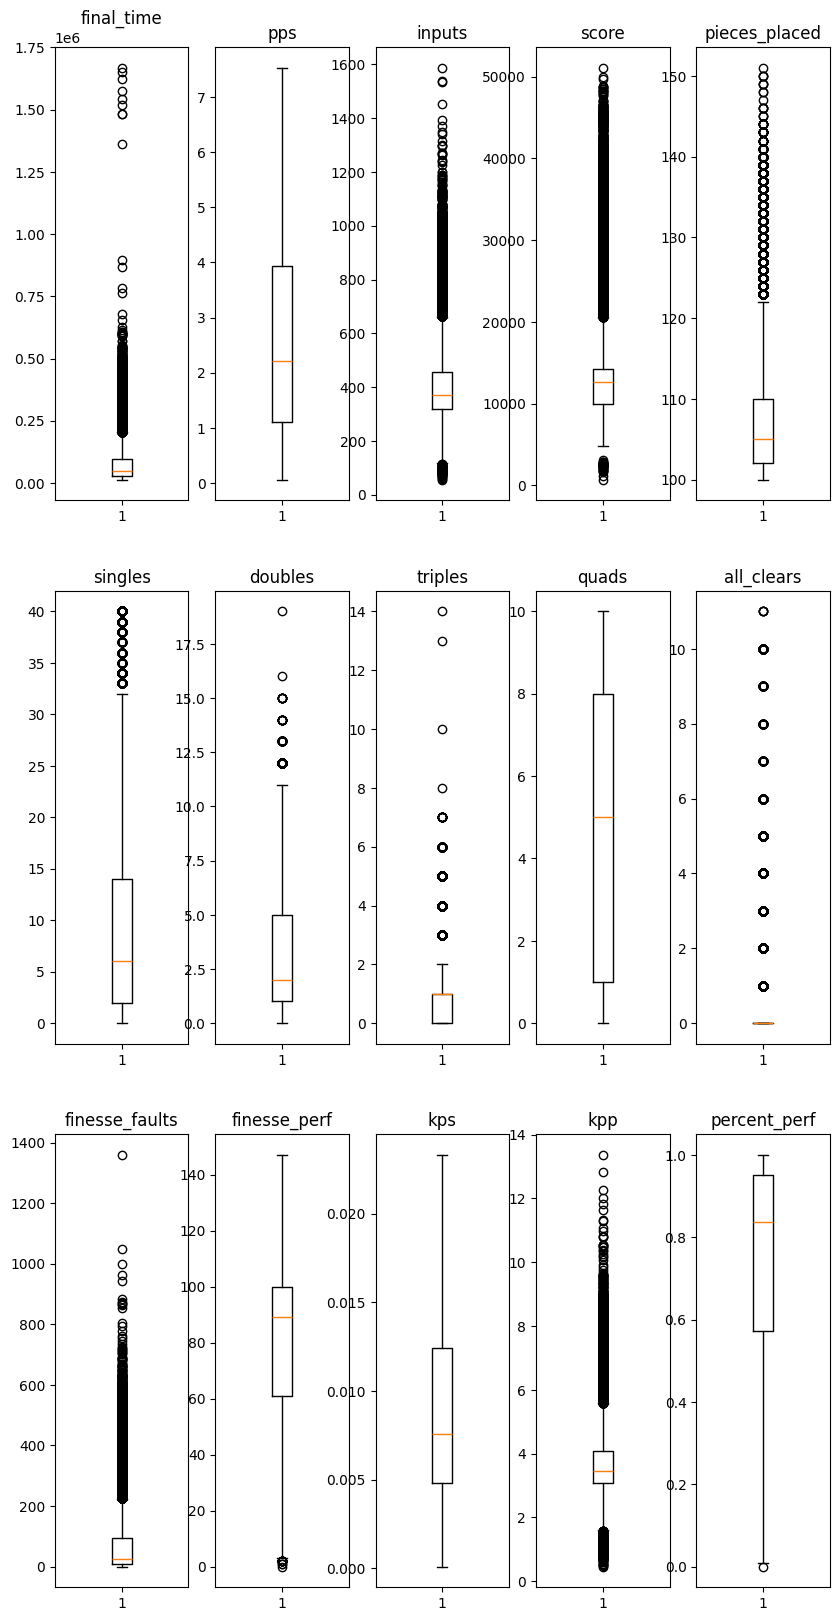

In [8]:
figure, axis = plt.subplots(3, 5, figsize=(10,20))

for i in range(3):
    for j in range(5):
        axis[i][j].boxplot(record_df.iloc[:,[(i*5)+j+5]].dropna())
        axis[i][j].set_title(record_df.columns[(i*5)+j+5])

# record_df.loc[:, ["finesse_faults"]].boxplot()

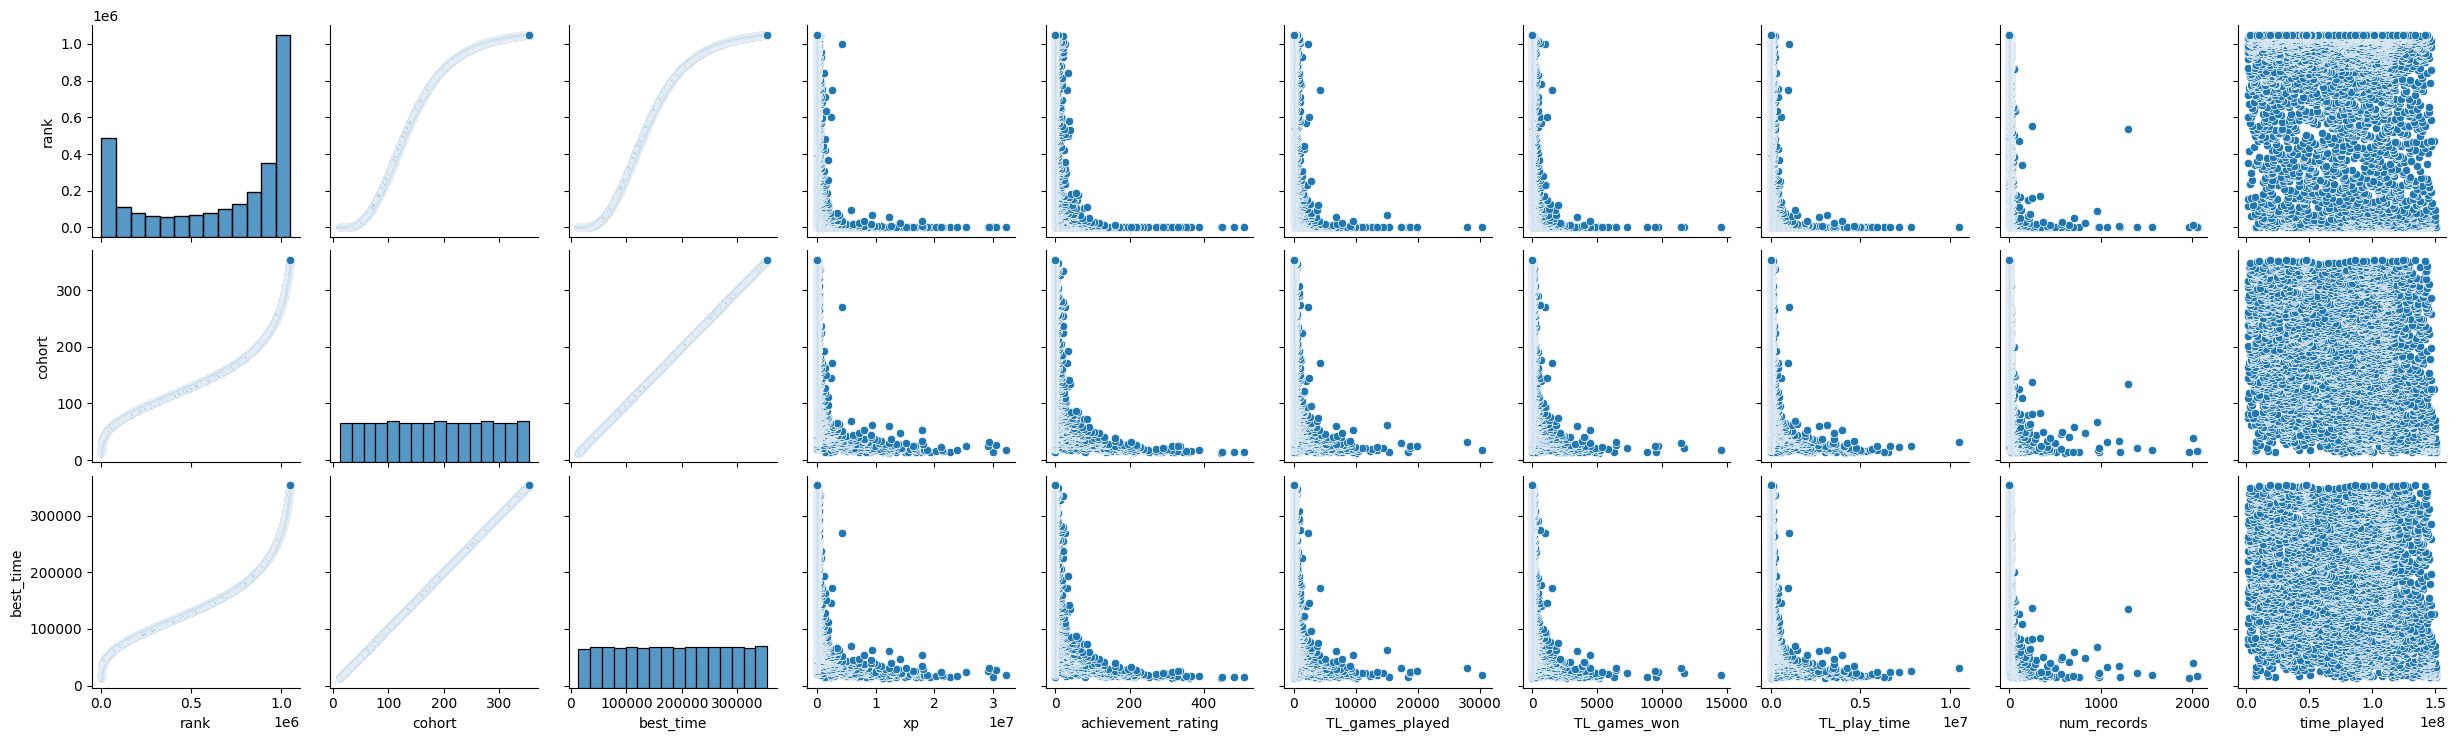

In [9]:
seaborn.pairplot(user_df, y_vars=["rank", "cohort", "best_time"])

[Text(0.5, 1.0, 'Correlation between user attributes')]

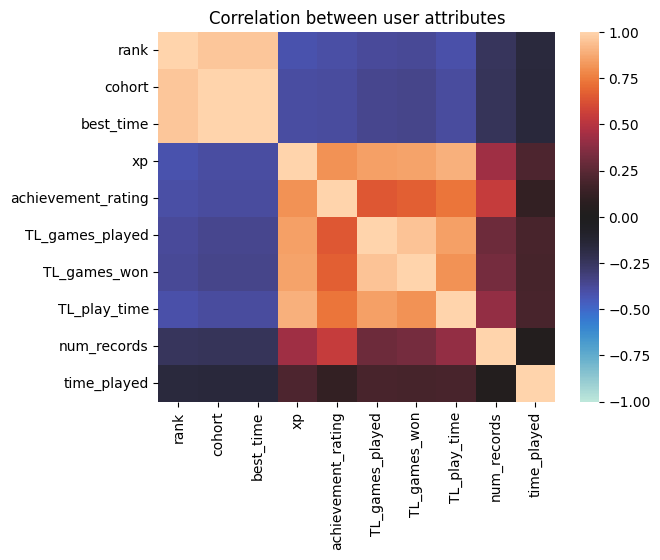

In [10]:
seaborn.heatmap(user_df.corr(numeric_only=True), cmap="icefire", center=0, vmin=-1, vmax=1).set(title="Correlation between user attributes")

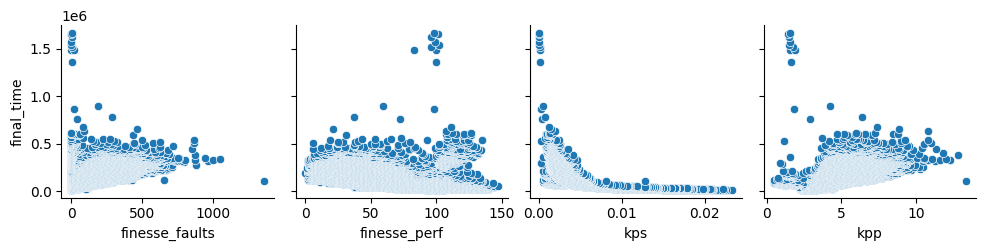

In [16]:
seaborn.pairplot(record_df, y_vars=["final_time"], x_vars=["pps", "inputs", "score", "pieces_placed", "finesse_faults", "finesse_perf", "kps", "kpp"])

[Text(0.5, 1.0, 'Correlation between record attributes')]

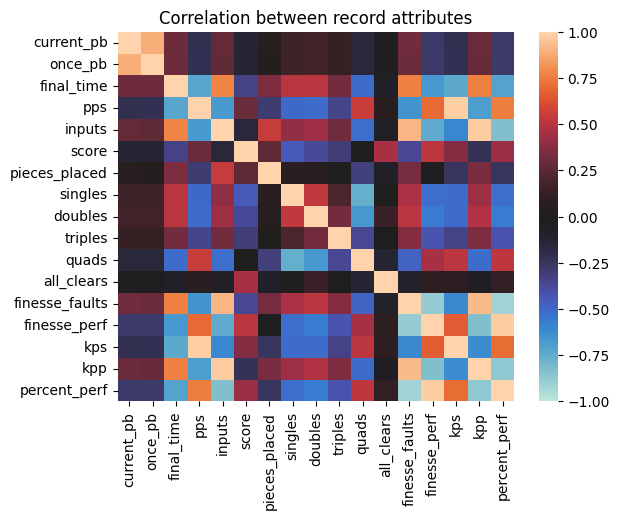

In [12]:
seaborn.heatmap(record_df.corr(numeric_only=True), cmap="icefire", center=0, vmin=-1, vmax=1).set(title="Correlation between record attributes")